This notebook is designed to assist you in playing around with some classifiers, though most of the code is already in the homework assignment writeup.


In [18]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

## Data Loading


In [19]:
# Data Loading
X = np.genfromtxt("data/X_train.txt", delimiter=None)
Y = np.genfromtxt("data/Y_train.txt", delimiter=None)

# The test data
Xte = np.genfromtxt("data/X_test.txt", delimiter=None)

All your work should be done on the training data set. To be able to make educated decisions on which classifier you're going to use, you should split it into train and validation data sets.


In [20]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

# Taking a subsample of the data so that trains faster.  You should train on whole data for homework.
Xt, Yt = Xtr[:4000], Ytr[:4000]

In [21]:
Xtr.shape

(160000, 14)

In [22]:
Xt.shape

(4000, 14)

# Decision Tree

In [23]:
# The decision tree classifier has minLeaf and maxDepth parameters.
learner = ml.dtree.treeClassify(Xt, Yt, minLeaf=25, maxDepth=15)

# Prediction
probs = learner.predictSoft(Xte)

The predictSoft method returns an $M \times C$ table in which for each point you have the proability of each class.


In [24]:
probs

array([[0.75      , 0.25      ],
       [0.90384615, 0.09615385],
       [0.92424242, 0.07575758],
       ...,
       [0.94827586, 0.05172414],
       [0.7175    , 0.2825    ],
       [0.98214286, 0.01785714]])

In [25]:
probs.shape

(200000, 2)

We can also compute the AUC for both the training and validation data sets.


In [26]:
# ROC is a probability curve and AUC represents degree or measure of separability
# AUC is the area under the ROC curve
print("{0:>15}: {1:.4f}".format("Train AUC", learner.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", learner.auc(Xva, Yva)))

      Train AUC: 0.8066
 Validation AUC: 0.6209


Play with different parameters to see how AUC changes.


# Printing decision tree

Funny enough, whoever wrote the decision tree classifier provided a printing mechanism. However, it only works up to depth 2, so not very useful for us.


In [27]:
learner = ml.dtree.treeClassify()
learner.train(Xt, Yt, maxDepth=2)
print(learner)

  if x[0] < 237.245000:
    if x[2] < 242.215000:
      Predict [0.45227996 0.54772004]
    else:
      Predict [0.69883041 0.30116959]
  else:
    if x[0] < 249.030000:
      Predict [0.69539337 0.30460663]
    else:
      Predict [0.79384134 0.20615866]



# Linear Classifier 

In [28]:
# Scaling the data
XtrP, params = ml.rescale(Xt)
XteP, _ = ml.rescale(Xte, params)

print(XtrP.shape, XteP.shape)

(4000, 14) (200000, 14)


In [29]:
## Linear models:
learner = ml.linearC.linearClassify()
learner.train(XtrP, Yt, initStep=0.5, stopTol=1e-6, stopIter=100)

probs = learner.predictSoft(XteP)
print(probs[:5])

[[0.7794684  0.2205316 ]
 [0.56946355 0.43053645]
 [0.81647372 0.18352628]
 [0.79368576 0.20631424]
 [0.72786685 0.27213315]]


And the AUC IS:


In [30]:
print("{0:>15}: {1:.4f}".format("Train AUC", learner.auc(XtrP, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", learner.auc(Xva, Yva)))

      Train AUC: 0.6472
 Validation AUC: 0.5763


This is why we're using a validation data set. We can see already that for THIS specific configuration the decision tree is much better. It is very likely that it'll be better on the test data.


# Neural Network


In [31]:
nn = ml.nnet.nnetClassify()

After we construct the classifier, we can define the sizes of its layers and initialize their values with "init_weights".

Definition of nn.init_weights:

        nn.init_weights(self, sizes, init, X, Y)

From the method description: sizes = [Ninput, N1, N2, ... , Noutput], where Ninput = # of input features, and Nouput = # classes

Training the model using gradient descent, we can track the surrogate loss (here, MSE loss on the output vector, compared to a 1-of-K representation of the class), as well as the 0/1 classification loss (error rate):


In [32]:
Xt.shape[1]

14

In [33]:
len(np.unique(Yt))

2

In [34]:
# first layer matrix: 14*5, activation function, second layer matrix: 5*2

In [35]:
# first layer matrix: 14*5, activation function,, second layer matrix: 5*3, activation function,, third layer: 3*2

In [36]:
# Need to specify the right number of input and output layers.
nn.init_weights([Xt.shape[1], 5, len(np.unique(Yt))], "random", Xt, Yt)
nn.train(
    Xt, Yt, stopTol=1e-8, stepsize=0.25, stopIter=50
)  # Really small stopIter so it will stop fast :)

it 1 : Jsur = 0.47327088546279183, J01 = 0.338
it 2 : Jsur = 0.458980643301179, J01 = 0.338
it 4 : Jsur = 0.4352169633533841, J01 = 0.338
it 8 : Jsur = 0.43531926047066105, J01 = 0.338
it 16 : Jsur = 0.43416758865144195, J01 = 0.338
it 32 : Jsur = 0.4342372845514982, J01 = 0.338


In [37]:
print("{0:>15}: {1:.4f}".format("Train AUC", nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", nn.auc(Xva, Yva)))

      Train AUC: 0.5993
 Validation AUC: 0.5929


The AUC results are bad because we just used a lame configuration of the NN.
One example is the option to change the activation function. This is the function that is in the inner layers. By default the code comes with the tanh, but the logistic (sigmoid) is also coded in and you can just specify it.


In [38]:
nn.setActivation("logistic")

nn.train(Xt, Yt, stopTol=1e-8, stepsize=0.25, stopIter=100)
print("{0:>15}: {1:.4f}".format("Train AUC", nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", nn.auc(Xva, Yva)))

/Users/harryxiong24/Code/Study/grad-code-collection/Winter 2024/ML/lab/Lab6/mltools/nnet.py:218: RuntimeWarning: overflow encountered in exp
  self.Sig = lambda z: twod(1 / (1 + np.exp(-z)))


it 1 : Jsur = 0.447668013819423, J01 = 0.338
it 2 : Jsur = 0.44747146909571944, J01 = 0.338
it 4 : Jsur = 0.44747349960993926, J01 = 0.338
it 8 : Jsur = 0.4474867698659233, J01 = 0.338
it 16 : Jsur = 0.4474868530202253, J01 = 0.338
it 32 : Jsur = 0.4474739262918074, J01 = 0.338
it 64 : Jsur = 0.44748047965190857, J01 = 0.338
      Train AUC: 0.5002
 Validation AUC: 0.5002


### Writing your own activation function

Not suprisingly, you can also provide a custom activation function. Note that for the last layer you will probably always want the sigmoid function, so only change the inner layers ones.

The function definition is this:

    setActivation(self, method, sig=None, d_sig=None, sig_0=None, d_sig_0=None)

You can call it with method='custom' and then specify both sig and d_sig. (the '0' ones are for the last layer)


In [39]:
# Here's a dummy activation method (f(x) = x)
sig = lambda z: np.atleast_2d(z)
dsig = lambda z: np.atleast_2d(1)

In [40]:
nn = ml.nnet.nnetClassify()
nn.init_weights([Xt.shape[1], 5, len(np.unique(Yt))], "random", Xt, Yt)

nn.setActivation("custom", sig, dsig)

nn.train(Xt, Yt, stopTol=1e-8, stepsize=0.25, stopIter=100)
print("{0:>15}: {1:.4f}".format("Train AUC", nn.auc(Xt, Yt)))
print("{0:>15}: {1:.4f}".format("Validation AUC", nn.auc(Xva, Yva)))

it 1 : Jsur = nan, J01 = 0.338


/Users/harryxiong24/Code/Study/grad-code-collection/Winter 2024/ML/lab/Lab6/mltools/nnet.py:48: RuntimeWarning: overflow encountered in exp
  self.Sig0 = lambda Z: 1.0/(1.0 + np.exp(-Z))   # final layer nonlinearity & derivative


it 2 : Jsur = nan, J01 = 0.338
it 4 : Jsur = nan, J01 = 0.338
it 8 : Jsur = nan, J01 = 0.338
it 16 : Jsur = nan, J01 = 0.338
it 32 : Jsur = nan, J01 = 0.338
it 64 : Jsur = nan, J01 = 0.338
      Train AUC: 0.5198
 Validation AUC: 0.4999


Train AUC: 0.5198 <br>
Validation AUC: 0.4999


## Plotting

We've learn that one way of guessing how well we're doing with different model parameters is to plot the train and validation errors as a function of that paramter (e.g, k in the KNN of degree in the linear classifier and regression).

Now it seems like there could be more parameters involved? One example is the degree and the regularizer value (see. HW assignment for more examples).

When it's two features you can use heatmaps. The X-axis and Y-axis represent the parameters and the "heat" is the validation/train error as a "third" dimension".


We're going to use a dummy function to show that. Let's assume we have two parameters p1 and p2 and the prediction accuracy is p1 + p2 (yup, that stupid). In the HW assignment it's actually the auc.


In [41]:
p1 = np.arange(5)
p2 = np.arange(5)

In [42]:
auc = np.zeros([p1.shape[0], p2.shape[0]])
for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
        auc[i][j] = p1[i] + p2[j]

In [43]:
auc

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 5.],
       [2., 3., 4., 5., 6.],
       [3., 4., 5., 6., 7.],
       [4., 5., 6., 7., 8.]])

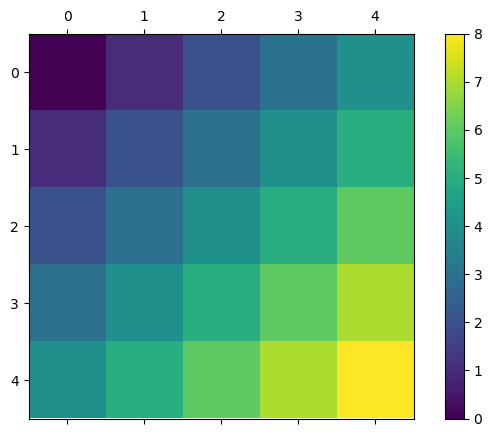

In [44]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax = ax.matshow(auc)
f.colorbar(cax)

ax.set_xticks(p1)
ax.set_xticklabels(["%d" % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(["%d" % p for p in p2])

plt.show()

<h2> For homework: <br> <br>

x and y will be hyperparameters of the model <br>
f will be some performance metric (error, AUC etc.) </h2>


<br>
